# Housing Prices 🏠🏡

Reference
- Kaggle Courses : https://www.kaggle.com/learn
- Kaggle 'Competition Notebook for Beginners🤓Top 1%' by MUSA KHAN : https://www.kaggle.com/code/lazer999/competition-notebook-for-beginners-top-1
- Kaggle 'Data Science Workflow TOP 2% (with Tuning)' by AQX : https://www.kaggle.com/code/angqx95/data-science-workflow-top-2-with-tuning
- tistory TEAM EDA (KR) : https://eda-ai-lab.tistory.com/

In [270]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [271]:
# load data
housedata_train = pd.read_csv('input/train.csv')
housedata_test = pd.read_csv('input/test.csv')
y = housedata_train.SalePrice

### Data Exploration

In [272]:
housedata_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
housedata_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [278]:
# data size
R_train, C_train = housedata_train.shape
R_test, C_test = housedata_test.shape
print('Training set : {} × {}'.format(R_train, C_train))
print('Validation set : {} × {}'.format(R_test, C_test))
print('The number of null on SalePrice : {}'.format(y.isnull().sum())) # The number of null on 'Saleprice'

Training set : 1460 × 81
Validation set : 1459 × 80
The number of null on SalePrice : 0


In [274]:
housedata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


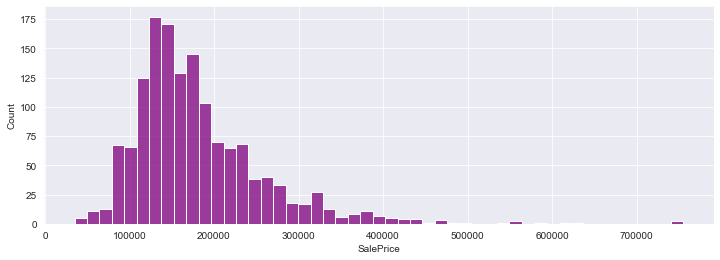

In [365]:
# SalePrice 
fig = plt.figure(figsize=(12,4))
sns.histplot(data=y, color='purple')
plt.show; 
print(y.describe())

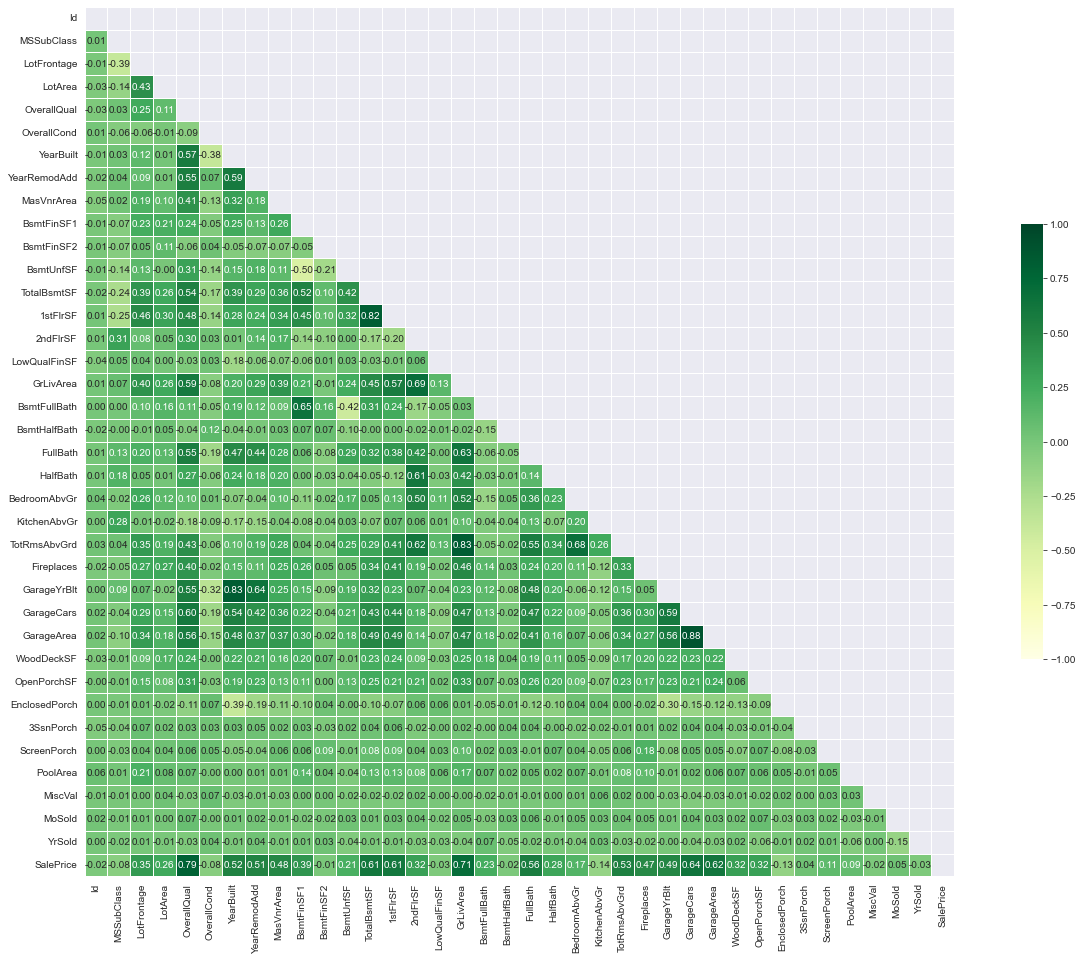

In [281]:
# heat map
plt.figure(figsize=(24,16))
## mask plot
mask = np.zeros_like(housedata_train.corr())
mask[np.triu_indices_from(mask)] = True
## Draw
sns.heatmap(housedata_train.corr(), mask=mask, square=True, annot=True, fmt='.2f', linewidths=.5, cmap="YlGn", cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
plt.show()

* High Score
1stFlrSF-TotalBsmtSF : 0.82
TotRmsAbvGrd-GrLiveArea:0.83
GarageYrBlt-YearBuilt: 0.83
GarageCars-GarageArea:0.88

In [119]:
# features 1 (relate to Saleprice : ≥ 0.3)
features_1=['LotFrontage','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']
# exception_1=['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
#             'HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
housedata_train1 = housedata_train[features_1]

In [120]:
# features 2 (relate to Saleprice : ≥ 0.5)
features_2=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars', 'GarageArea','SalePrice']
# exception_2=['MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
#             'BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
#             'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'] 
housedata_train2 = housedata_train[features_2]

In [183]:
# features 3 (relate to Saleprice : ≥ 0.5, except for features with multicollinearity )
features_3=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','GarageArea','SalePrice']
# exception_2=['MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
#             'BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
#             'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'] 
housedata_train3 = housedata_train[features_3]

In [241]:
# features scaling
#std = StandardScaler()
#std.fit(housedata_train1)
#hd_train1_scaled=std.transform(housedata_train1)
#hd_train1_scaled=pd.DataFrame.from_records(hd_train1_scaled)
#for j in range(len(features_1)):
#    hd_train1_scaled = hd_train1_scaled.rename(columns={j:features_1[j]})

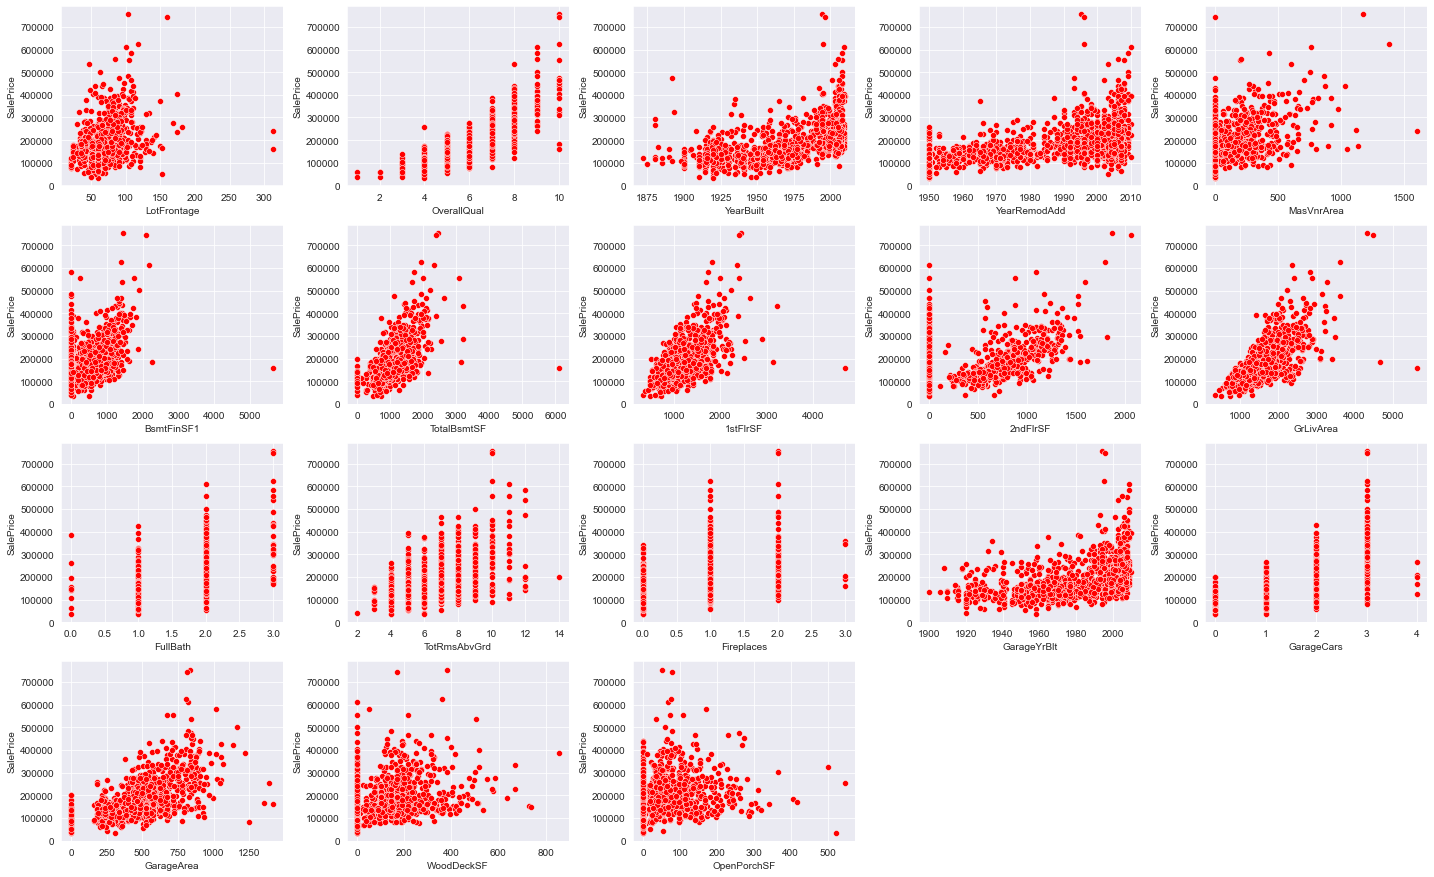

In [381]:
fig = plt.figure(figsize=(20,24))
for index1 in range(len(features_1)-1):
    plt.subplot(8,5,index1+1)
    sns.scatterplot(x=housedata_train1.iloc[:, index1],y=y,data=housedata_train1 ,color='r',marker='o')
fig.tight_layout(pad=1.0)

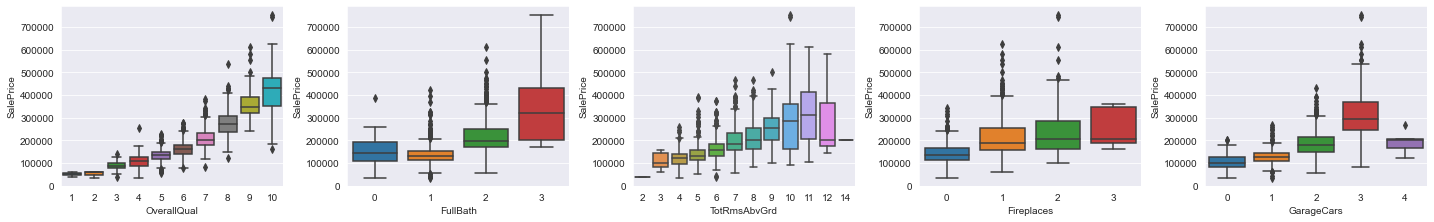

In [386]:
features_box=['OverallQual','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars']
housedata_box=housedata_train1[features_box]
fig = plt.figure(figsize=(20,24))
for index2 in range(len(features_box)):
    plt.subplot(8,5,index2+1)
    sns.boxplot(x=housedata_box.iloc[:, index2],y=y,data=housedata_train1)
fig.tight_layout(pad=1.0)

#### * Course :  intro to Machine Learning

In [210]:
from sklearn.tree import DecisionTreeRegressor

X = housedata_train3

DTR_model = DecisionTreeRegressor(random_state=1)
DTR_model.fit(X, y)
pred_DTR = DTR_model.predict(X)
mae_DTR = mean_absolute_error(pred_DTR, y)
print(pred_DTR)
print("Mean Ablsolute Error : {:,.0f}".format(mae_DTR))

[208500. 181500. 223500. ... 266500. 142125. 147500.]
Mean Ablsolute Error : 0


In [211]:
from sklearn.ensemble import RandomForestRegressor

X = housedata_train3
RFR_model = RandomForestRegressor(random_state=1)
RFR_model.fit(X, y)
pred_RFR = RFR_model.predict(X)
mae_RFR = mean_absolute_error(pred_RFR, y)
print(pred_RFR)
print("Mean Ablsolute Error : {:,.0f}".format(mae_RFR))

[208515.   181354.38 223454.   ... 266434.11 142081.   147368.  ]
Mean Ablsolute Error : 141


### Missing Values

* Reasons for possible missing values
    - MCAR(Missing completely at Random)
    - MAR(Missing at Random)
    - MNAR(Missing at not Random)

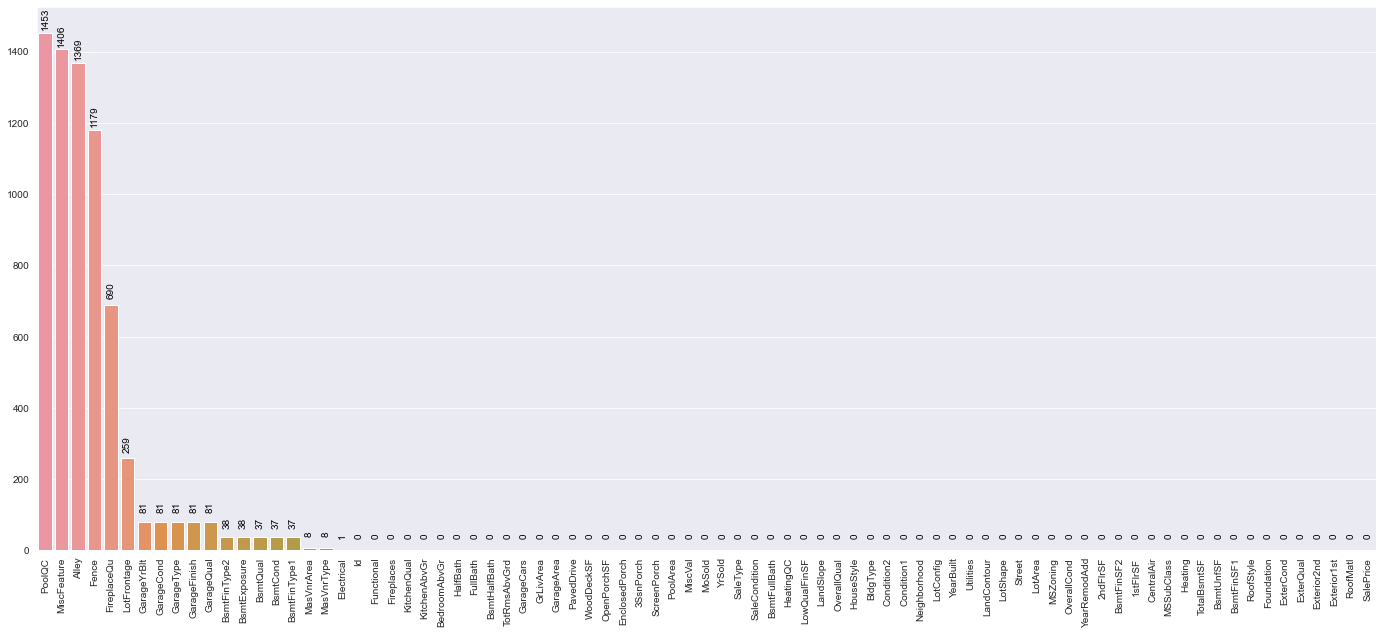

In [282]:
plt.figure(figsize=(24,10))
# colums with the most null values
cols_with_null = housedata_train.isnull().sum().sort_values(ascending=False)
# visualization
ax = sns.barplot(x=cols_with_null.index, y=cols_with_null)
## plot-annotation
for i in ax.patches:  
    ax.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height() + 40),  ha='center', va='center',  fontsize=10, color='black', rotation=90)
## x-axis index rotation
plt.xticks(rotation=90) 
plt.show;

In [269]:
#cols_to_drop=(cols_with_null.head(4).index).tolist() #drop 1st-4th rank columns
#housedata_train.drop(cols_to_drop,axis=1,inplace=True)
#housedata_test.drop(cols_to_drop,axis=1,inplace=True)
#R_train, C_train = housedata_train.shape
#print('Training set(drop) : {} × {}'.format(R_train, C_train))

##### 1. Garage Group : GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual, GarageArea, GarCars
- Prediction: The parking lot does not exist and will be missing

In [268]:
Garage = ['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageArea','GarCars']